<a href="https://colab.research.google.com/github/insaiyancvk/Dere-Net/blob/main/Dere_net_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

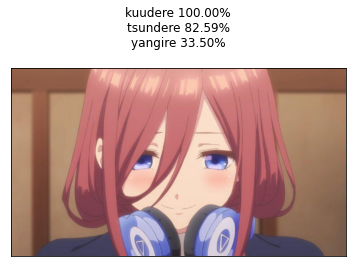

In [4]:
#@title Test on waifu images from internet

from torchvision import transforms as transforms
from torchvision.models import resnet18
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import requests, torch, warnings
warnings.filterwarnings("ignore")
from PIL import Image

class_list = [
    'dandere',
    'deredere',
    'himdere',
    'kuudere',
    'tsundere',
    'yandere',
    'yangire'
]

resnet = resnet18(pretrained=False)
resnet.fc = nn.Linear(resnet.fc.in_features,7)
# !wget https://raw.githubusercontent.com/insaiyancvk/Dere-Net/main/assets/derenet18.pth
resnet.load_state_dict(torch.load("derenet18.pth", map_location=torch.device('cpu')))
transform = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
img_url = "https://9tailedkitsune.com/wp-content/uploads/2021/07/mikunakano.jpg" #@param {type:"string"}
# img_obj = urllib.urlopen(img_url)
img = Image.open(requests.get(img_url, stream=True).raw)
img_processed = transform(img)
preds = resnet(img_processed.unsqueeze(0))
preds = preds.cpu().data.numpy()
f = plt.imshow(img)
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)
pred = ''
idx = np.argsort(preds[0])
idx = idx.tolist()

if type(preds) != list:
  preds = preds.tolist()
for i in idx[::-1][:3]:
  pred+= f"{class_list[i]} {(preds[0][i]/preds[0][idx[-1]])*100:.2f}%\n"
plt.title(
    pred,
    loc='center'
);
